In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

In [146]:
spectra_df = pd.read_csv("data/msn1D1A_pos_100AGC.csv", sep=",")
spectra_df.INTENSITIES = spectra_df.INTENSITIES.apply(lambda v: json.loads(v))
spectra_df.MZS = spectra_df.MZS.apply(lambda v: json.loads(v))
spectra_df.PRECURSOR_LIST = spectra_df.PRECURSOR_LIST.apply(lambda v: json.loads(v))
spectra_df["FILENAME_NO_EXT"] = spectra_df["FILENAME"].apply(lambda v: v.split(".")[0])
spectra_df["lib_plate_well"] = spectra_df["FILENAME_NO_EXT"].apply(lambda v: "pluskal_{}".format(v.split("pluskal_")[1]))
spectra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18950 entries, 0 to 18949
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FILENAME         18950 non-null  object 
 1   SCAN_NUMBER      18950 non-null  int64  
 2   TREE_ID          18950 non-null  int64  
 3   MS_LEVEL         18950 non-null  int64  
 4   PRECURSOR_MZ     18950 non-null  float64
 5   PRECURSOR_MS2    18950 non-null  float64
 6   PRECURSOR_LIST   18950 non-null  object 
 7   N_SIGNALS        18950 non-null  int64  
 8   MAX_MSN          18950 non-null  int64  
 9   N_PREC           18950 non-null  int64  
 10  N_PREC_MS3       18950 non-null  int64  
 11  N_PREC_MS4       18950 non-null  int64  
 12  N_PREC_MS5       18950 non-null  int64  
 13  N_PREC_MS6       18950 non-null  int64  
 14  N_SPEC           18950 non-null  int64  
 15  N_MS2            18950 non-null  int64  
 16  N_MS3            18950 non-null  int64  
 17  N_MS4       

In [147]:
def get_intensities(df, min_ms_level, max_ms_level=None):
    if max_ms_level is None or max_ms_level<=min_ms_level:
        filtered = df[df["MS_LEVEL"]==min_ms_level]
    else:
        filtered = df[df["MS_LEVEL"].between(min_ms_level,max_ms_level, 'both')]
    return np.concatenate(filtered.INTENSITIES.values)

def get_mzs(df: pd.DataFrame, min_ms_level: int, max_ms_level=None):
    if max_ms_level is None or max_ms_level<=min_ms_level:
        filtered = df[df["MS_LEVEL"]==min_ms_level]
    else:
        filtered = df[df["MS_LEVEL"].between(min_ms_level,max_ms_level, 'both')]
    return np.concatenate(filtered.MZS.values)

def get_datapoints(df, min_ms_level, max_ms_level=None):
    if max_ms_level is None or max_ms_level<=min_ms_level:
        filtered = df[df["MS_LEVEL"]==min_ms_level]
    else:
        filtered = df[df["MS_LEVEL"].between(min_ms_level,max_ms_level, 'both')]

    return np.concatenate(filtered.MZS.values), np.concatenate(filtered.INTENSITIES.values)

In [148]:
def save_fig(file_name):
    plt.savefig("figures/{}.png".format(file_name), dpi=300)
    plt.savefig("figures/{}.pdf".format(file_name))
    plt.savefig("figures/{}.svg".format(file_name))

In [149]:
spectra_df["MIN_INTENSITY"] = spectra_df["INTENSITIES"].apply(lambda intensities: min(intensities))
spectra_df["N_SIGNALS_FILTERED"] = [sum(value > min_intensity*3 for value in intensities) for intensities, min_intensity in zip(spectra_df["INTENSITIES"], spectra_df["MIN_INTENSITY"])]
spectra_df

,FILENAME,SCAN_NUMBER,TREE_ID,MS_LEVEL,PRECURSOR_MZ,PRECURSOR_MS2,PRECURSOR_LIST,N_SIGNALS,MAX_MSN,N_PREC,...,N_MS3,N_MS4,N_MS5,N_MS6,MZS,INTENSITIES,FILENAME_NO_EXT,lib_plate_well,MIN_INTENSITY,N_SIGNALS_FILTERED
0,20220601_100AGC_pluskal_mce_1D1_A1.mzML,635,1,2,820.42548,820.42548,[820.42548],23,3,1,...,3,0,0,0,"[43.8405, 45.13671, 53.73099, 75.37957, 77.848...","[3702.0, 5165.0, 3650.0, 3574.0, 3898.0, 4044....",20220601_100AGC_pluskal_mce_1D1_A1,pluskal_mce_1D1_A1,3238.0,4
1,20220601_100AGC_pluskal_mce_1D1_A1.mzML,636,1,2,820.42548,820.42548,[820.42548],32,3,1,...,3,0,0,0,"[48.78587, 66.07412, 95.04888, 97.70415, 98.09...","[3786.0, 3620.0, 8386.0, 3484.0, 9554.0, 9771....",20220601_100AGC_pluskal_mce_1D1_A1,pluskal_mce_1D1_A1,3484.0,10
2,20220601_100AGC_pluskal_mce_1D1_A1.mzML,638,1,2,820.42548,820.42548,[820.42548],11,3,1,...,3,0,0,0,"[45.13657, 59.34844, 64.06611, 87.5909, 110.09...","[6631.0, 3854.0, 4824.0, 3704.0, 7774.0, 3437....",20220601_100AGC_pluskal_mce_1D1_A1,pluskal_mce_1D1_A1,3437.0,3
3,20220601_100AGC_pluskal_mce_1D1_A1.mzML,640,1,3,406.22366,820.42548,"[820.42548, 406.22366]",17,3,1,...,3,0,0,0,"[42.52863, 47.96465, 87.80611, 88.09949, 104.4...","[912.0, 876.0, 1010.0, 1045.0, 986.0, 6836.0, ...",20220601_100AGC_pluskal_mce_1D1_A1,pluskal_mce_1D1_A1,876.0,7
4,20220601_100AGC_pluskal_mce_1D1_A1.mzML,641,1,3,406.22366,820.42548,"[820.42548, 406.22366]",13,3,1,...,3,0,0,0,"[40.02489, 41.54426, 55.90057, 69.0683, 70.474...","[1000.0, 853.0, 862.0, 1150.0, 928.0, 955.0, 3...",20220601_100AGC_pluskal_mce_1D1_A1,pluskal_mce_1D1_A1,853.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18945,20220601_100AGC_pluskal_mce_1D1_A22.mzML,337,537,3,99.48804,136.99886,"[136.99886, 99.48804]",27,4,6,...,15,3,0,0,"[45.09131, 46.9948, 50.9718, 51.47599, 56.9645...","[1258.0, 1832.0, 1460.0, 2816.0, 112600.0, 267...",20220601_100AGC_pluskal_mce_1D1_A22,pluskal_mce_1D1_A22,1174.0,15
18946,20220601_100AGC_pluskal_mce_1D1_A22.mzML,338,537,3,99.48804,136.99886,"[136.99886, 99.48804]",25,4,6,...,15,3,0,0,"[44.9792, 46.99488, 50.97187, 56.96457, 56.969...","[8172.0, 3729.0, 2397.0, 90140.0, 1531.0, 1639...",20220601_100AGC_pluskal_mce_1D1_A22,pluskal_mce_1D1_A22,1015.0,14
18947,20220601_100AGC_pluskal_mce_1D1_A22.mzML,339,537,3,97.99453,136.99886,"[136.99886, 97.99453]",47,4,6,...,15,3,0,0,"[51.4761, 53.79455, 56.96458, 58.98764, 59.977...","[1323.0, 1128.0, 49940.0, 8607.0, 1947.0, 6170...",20220601_100AGC_pluskal_mce_1D1_A22,pluskal_mce_1D1_A22,826.0,29
18948,20220601_100AGC_pluskal_mce_1D1_A22.mzML,340,537,3,97.99453,136.99886,"[136.99886, 97.99453]",50,4,6,...,15,3,0,0,"[46.99485, 46.99693, 50.9877, 51.47592, 56.964...","[2801.0, 2129.0, 1340.0, 6470.0, 215000.0, 631...",20220601_100AGC_pluskal_mce_1D1_A22,pluskal_mce_1D1_A22,1107.0,23


## Add compound matches to spectra_df

In [150]:
lib_id = "mce"
filename = "data/lib_formatted_{}.csv".format(lib_id)
lib_df = pd.read_csv(filename, sep="\t")
lib_df["all_ions"] = lib_df.apply(lambda row: [row["mz_h_smiles"], row["mz_na_smiles"]], axis=1)
lib_df.head()

,RackCode,Original Plate Location,Short Name (A & B Coulumn),Mixture plate name,Diltuted Duplicate 1,Diltuted Duplicate 2,Diltuted Duplicate 3,VialCode,Cat. No.,Product Name,...,raw_filename,final_plate_location,exact_mass,mz_h,mz_na,exact_mass_smiles,mz_h_smiles,mz_na_smiles,mass_matches,all_ions
0,HYCPK16574,A10,574_A10,M1_A1,1D1_A1,2D1_A1,3D1_A1,NaN,HY-13796,IPSU,...,20220613_100AGC_60000Res_pluskal_mce_1D1_A1,A1,405.216475,406.223752,428.205696,405.216475,406.223752,428.205696,True,"[406.22375156623, 428.20569581600006]"
1,HYCPK16574,A11,574_A11,M1_A1,1D1_A1,2D1_A1,3D1_A1,NaN,HY-19831A,(Z)-4EGI-1,...,20220613_100AGC_60000Res_pluskal_mce_1D1_A1,A1,449.995631,451.002908,472.984852,449.995631,451.002908,472.984852,True,"[451.00290768623, 472.984851936]"
2,HYCPK16574,A2,574_A2,M1_A1,1D1_A1,2D1_A1,3D1_A1,NaN,HY-15338,TG003,...,20220613_100AGC_60000Res_pluskal_mce_1D1_A1,A1,249.082350,250.089626,272.071571,249.082350,250.089626,272.071570,True,"[250.08962618223, 272.071570432]"
3,HYCPK16574,A3,574_A3,M1_A1,1D1_A1,2D1_A1,3D1_A1,NaN,HY-15440B,Fostemsavir Tris,...,20220613_100AGC_60000Res_pluskal_mce_1D1_A1,A1,704.231941,705.239218,727.221162,583.158047,584.165324,606.147268,False,"[584.16532388423, 606.147268134]"
4,HYCPK16574,A4,574_A4,M1_A1,1D1_A1,2D1_A1,3D1_A1,NaN,HY-114315,NQO1 substrate,...,20220613_100AGC_60000Res_pluskal_mce_1D1_A1,A1,268.019667,269.026943,291.008888,268.019667,269.026944,291.008888,True,"[269.02694358623, 291.00888783600004]"


In [151]:
def find_match(spectrum_row, lib_df):
    if spectrum_row["MS_LEVEL"] > 2:
        return []

    precursor_mz = spectrum_row["PRECURSOR_MS2"]
    filtered_df = lib_df[(lib_df["lib_plate_well"] == spectrum_row["lib_plate_well"]) & lib_df["mz_h_smiles"].between(precursor_mz-mz_tolerance, precursor_mz+mz_tolerance)]

    return filtered_df.index.tolist()

def propagate_match(spectrum_row, spectra_df):
    tree_id = spectrum_row["TREE_ID"]
    filtered_df = spectra_df[(spectra_df["TREE_ID"] == tree_id) & (spectra_df["MS_LEVEL"] == 2)]
    return filtered_df["LIB_INDEX"].values[0]

In [152]:
mz_tolerance = 0.05

# find index in metadata lib_df
#filtered_spectra = spectra_df.loc[spectra_df["MS_LEVEL"] == 2]
spectra_df["LIB_INDEX"] = spectra_df.apply(lambda row: find_match(row, lib_df), axis=1)
# propagate index to MSn
spectra_df["LIB_INDEX"] = spectra_df.apply(lambda row: propagate_match(row, spectra_df), axis=1)
# transfer metadata columns
spectra_df["PRODUCT_NAME"] = spectra_df["LIB_INDEX"].apply(lambda index: lib_df.at[index[0], "Product Name"] if len(index) >= 1 else "")
spectra_df["SMILES"] = spectra_df["LIB_INDEX"].apply(lambda index: lib_df.at[index[0], "Smiles"] if len(index) >= 1 else "")
spectra_df["EXACT_MASS"] = spectra_df["LIB_INDEX"].apply(lambda index: lib_df.at[index[0], "exact_mass_smiles"] if len(index) >= 1 else np.nan)
spectra_df["ANNOTATED"] = spectra_df["LIB_INDEX"].apply(lambda index: len(index) >= 1)
spectra_df["N_MATCHES"] = spectra_df["LIB_INDEX"].apply(lambda index: len(index))

In [153]:
# find all with match, keep best spectrum (highest N of signals) for each precursor of each compound
matched_df = spectra_df[spectra_df["N_MATCHES"] >= 1]
matched_df["FIRST_LIB_INDEX"] = [lib_ids[0] if len(lib_ids)>0 else "" for lib_ids in matched_df['LIB_INDEX']]
matched_df["PRECURSOR_MZ_LOW_RES"] = [round(mz, 2) for mz in matched_df['PRECURSOR_MZ']]
matched_df = matched_df.sort_values('N_SIGNALS_FILTERED', ascending=False).drop_duplicates(['FIRST_LIB_INDEX','PRECURSOR_MZ_LOW_RES'], keep="first").sort_index()

C:\Users\BrungsC\AppData\Local\Temp\ipykernel_17372\1973321928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_df["FIRST_LIB_INDEX"] = [lib_ids[0] if len(lib_ids)>0 else "" for lib_ids in matched_df['LIB_INDEX']]
C:\Users\BrungsC\AppData\Local\Temp\ipykernel_17372\1973321928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_df["PRECURSOR_MZ_LOW_RES"] = [round(mz, 2) for mz in matched_df['PRECURSOR_MZ']]


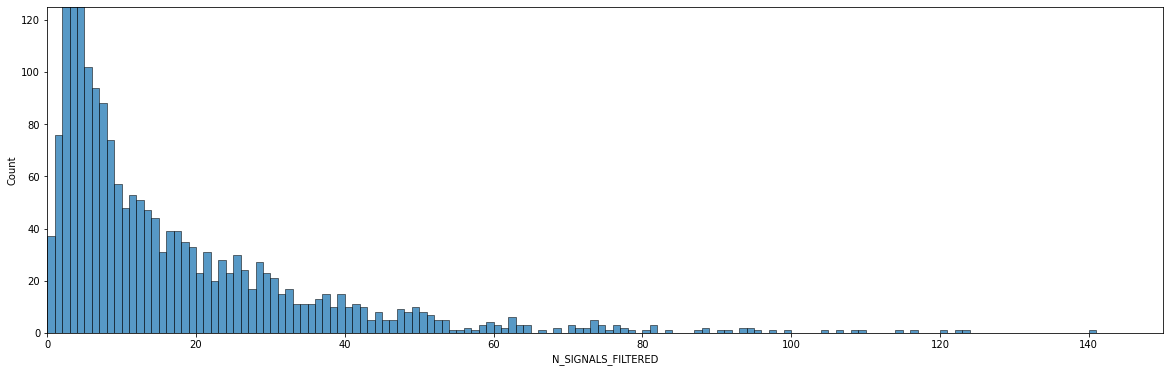

In [154]:
plt.figure(figsize=(20, 6))
ax = sns.histplot(data=matched_df, x="N_SIGNALS_FILTERED", binwidth=1)
ax.set_xlim(0,150)
ax.set_ylim(0,125)
save_fig("histo_signals_gr_3xmin_intensity")

In [155]:
matched_df

,FILENAME,SCAN_NUMBER,TREE_ID,MS_LEVEL,PRECURSOR_MZ,PRECURSOR_MS2,PRECURSOR_LIST,N_SIGNALS,MAX_MSN,N_PREC,...,MIN_INTENSITY,N_SIGNALS_FILTERED,LIB_INDEX,PRODUCT_NAME,SMILES,EXACT_MASS,ANNOTATED,N_MATCHES,FIRST_LIB_INDEX,PRECURSOR_MZ_LOW_RES
8,20220601_100AGC_pluskal_mce_1D1_A1.mzML,160,2,2,584.16425,584.16425,[584.16425],37,3,1,...,3330.0,13,[3],Fostemsavir Tris,O=C(N1CCN(C(C2=CC=CC=C2)=O)CC1)C(C3=CN(COP(O)(...,583.158047,True,1,3,584.16
11,20220601_100AGC_pluskal_mce_1D1_A1.mzML,662,2,2,584.16541,584.16425,[584.16425],99,3,1,...,15050.0,47,[3],Fostemsavir Tris,O=C(N1CCN(C(C2=CC=CC=C2)=O)CC1)C(C3=CN(COP(O)(...,583.158047,True,1,3,584.17
21,20220601_100AGC_pluskal_mce_1D1_A1.mzML,1036,2,3,486.18851,584.16425,"[584.16425, 486.18887]",14,3,1,...,799.0,4,[3],Fostemsavir Tris,O=C(N1CCN(C(C2=CC=CC=C2)=O)CC1)C(C3=CN(COP(O)(...,583.158047,True,1,3,486.19
26,20220601_100AGC_pluskal_mce_1D1_A1.mzML,389,3,2,562.12048,562.12048,[562.12048],190,4,14,...,3740.0,87,[5],ALK inhibitor 1,O=S(C1=C(NC2=C(Br)C=NC(NC3=C(OC)C=C(N4CCN(C)CC...,561.115771,True,1,5,562.12
29,20220601_100AGC_pluskal_mce_1D1_A1.mzML,395,3,3,206.14192,562.12048,"[562.12048, 206.14192]",61,4,14,...,1881.0,19,[5],ALK inhibitor 1,O=S(C1=C(NC2=C(Br)C=NC(NC3=C(OC)C=C(N4CCN(C)CC...,561.115771,True,1,5,206.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18870,20220601_100AGC_pluskal_mce_1D1_A22.mzML,302,534,5,153.05713,181.07617,"[181.07617, 145.0647, 154.0649, 153.05713]",36,5,19,...,1997.0,19,[214],o-Phenanthroline,C12=C(N=CC=C3)C3=CC=C1C=CC=N2,180.068748,True,1,214,153.06
18876,20220601_100AGC_pluskal_mce_1D1_A22.mzML,268,534,3,128.04927,181.07617,"[181.07617, 128.04927]",49,5,19,...,1784.0,34,[214],o-Phenanthroline,C12=C(N=CC=C3)C3=CC=C1C=CC=N2,180.068748,True,1,214,128.05
18885,20220601_100AGC_pluskal_mce_1D1_A22.mzML,295,534,4,95.04886,181.07617,"[181.07617, 128.04927, 95.04886]",20,5,19,...,2040.0,10,[214],o-Phenanthroline,C12=C(N=CC=C3)C3=CC=C1C=CC=N2,180.068748,True,1,214,95.05
18891,20220601_100AGC_pluskal_mce_1D1_A22.mzML,259,534,3,127.05399,181.07617,"[181.07617, 127.05399]",50,5,19,...,1888.0,30,[214],o-Phenanthroline,C12=C(N=CC=C3)C3=CC=C1C=CC=N2,180.068748,True,1,214,127.05


In [ ]:
spectra_df.to_csv("data/spectra_match_{}.csv".format(lib_id), sep="\t", index=False)

## Analyze

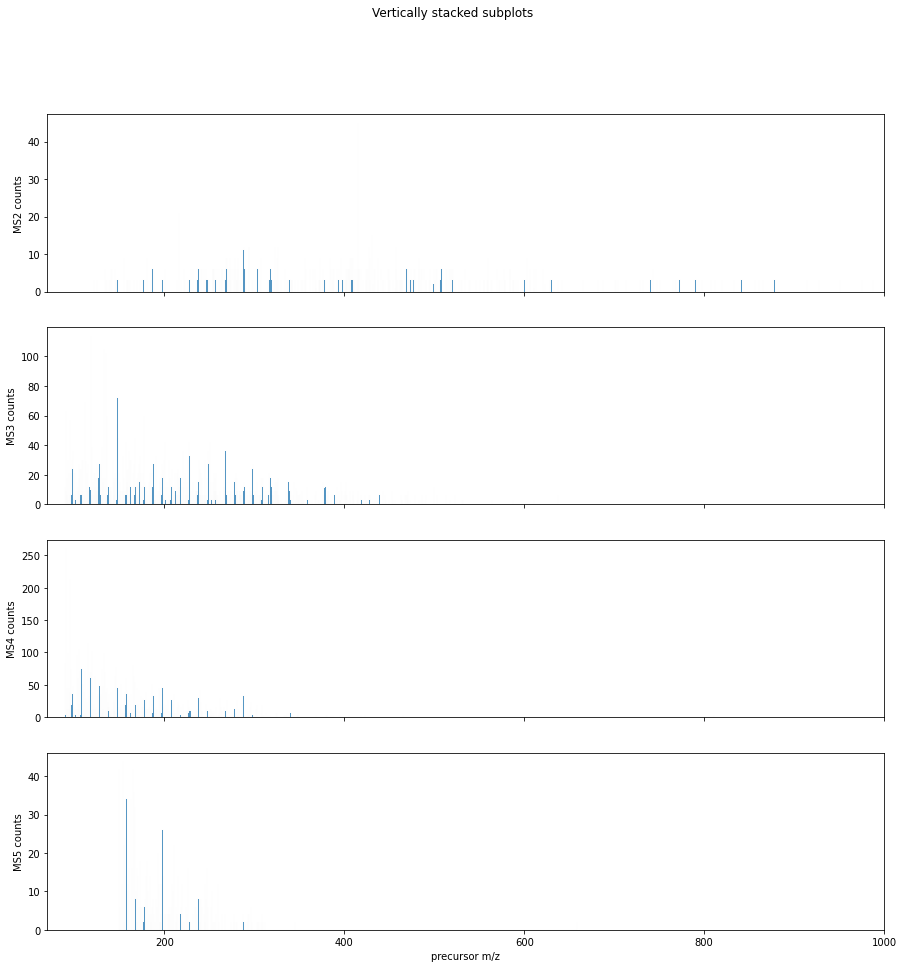

In [62]:
levels = [2,3,4,5]
fig, axs = plt.subplots(len(levels), sharex="all", figsize=(15,15))

fig.suptitle('Vertically stacked subplots')

for i, level in enumerate(levels):
    ax = sns.histplot(data=spectra_df[spectra_df["MS_LEVEL"]==level], ax=axs[i], x="PRECURSOR_MZ", binwidth=0.1)
    ax.set(xlabel='precursor m/z', ylabel='MS{} counts'.format(level))
    ax.set_xlim(70,1000)
    #ax.set_ylim(0, 40)

(40.0, 800.0)

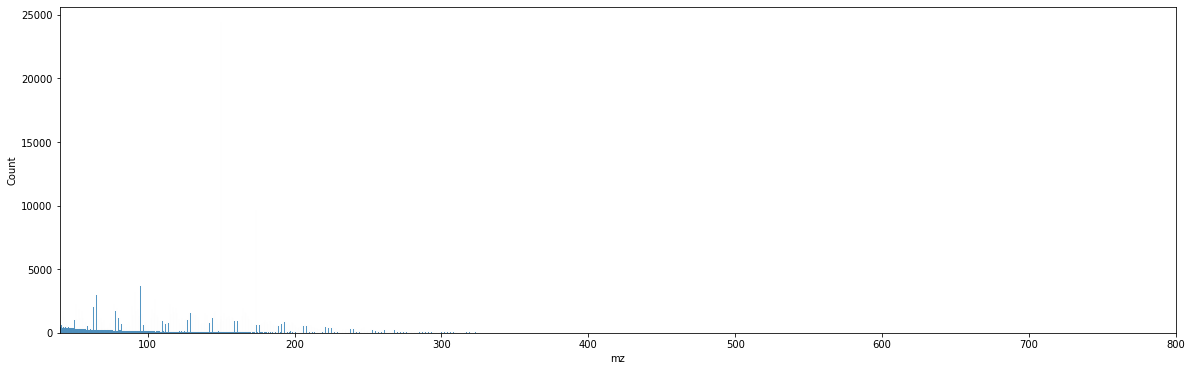

In [63]:
plt.figure(figsize=(20, 6))
mzs, intensities = get_datapoints(spectra_df, 3, 6)

df = pd.DataFrame({"mz": mzs, "intensity": intensities})
ax = sns.histplot(data=df[df["intensity"]>1500], x="mz", binwidth=0.1)
ax.set_xlim(40,800)
# ax.set_xlim(50,500)

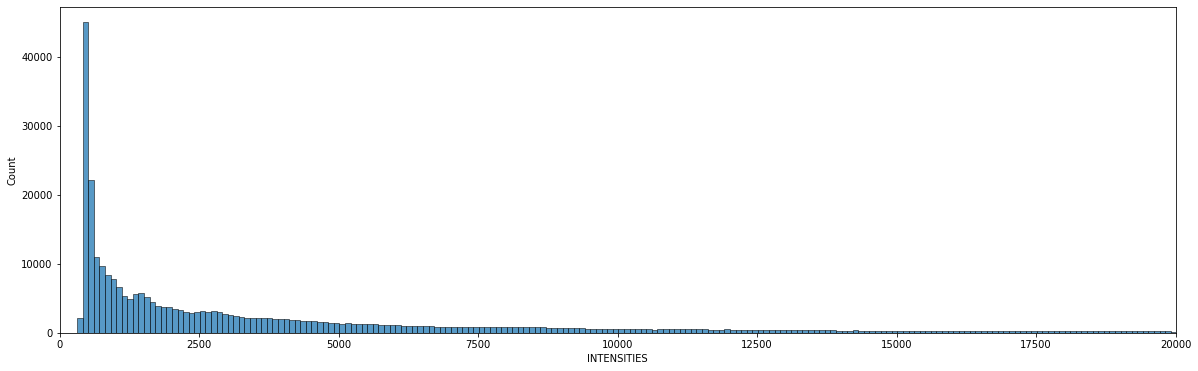

In [64]:
plt.figure(figsize=(20, 6))
intensities = get_intensities(spectra_df, 3)
df = pd.DataFrame({"INTENSITIES": intensities})
count_intensities_MS3 = sns.histplot(data=df[df["INTENSITIES"]<20000], x="INTENSITIES", binwidth=100)
count_intensities_MS3.set_xlim(0,20000)
save_fig("histo_intensity_ms3")

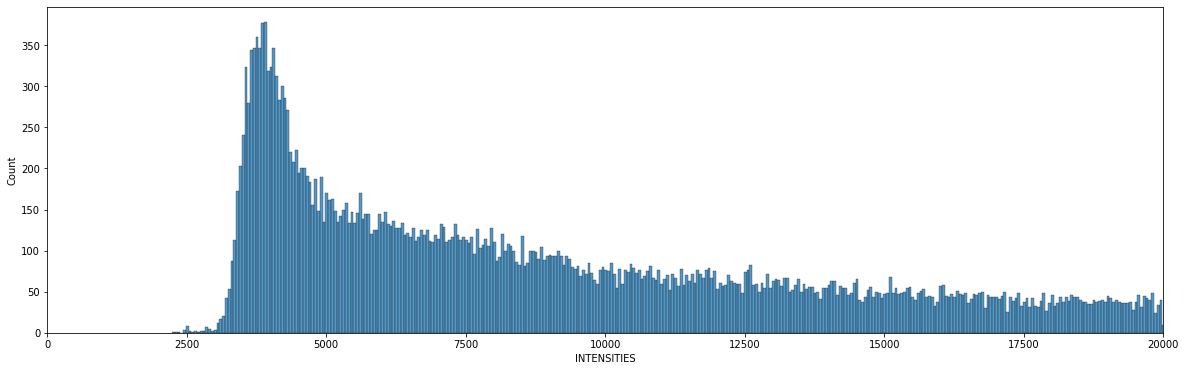

In [65]:
plt.figure(figsize=(20, 6))
intensities = get_intensities(spectra_df, 2)
df = pd.DataFrame({"INTENSITIES": intensities})
count_intensities_MS2 = sns.histplot(data=df[df["INTENSITIES"]<20000], x="INTENSITIES", binwidth=50)
count_intensities_MS2.set_xlim(0,20000)
save_fig("histo_intensities_MS2")

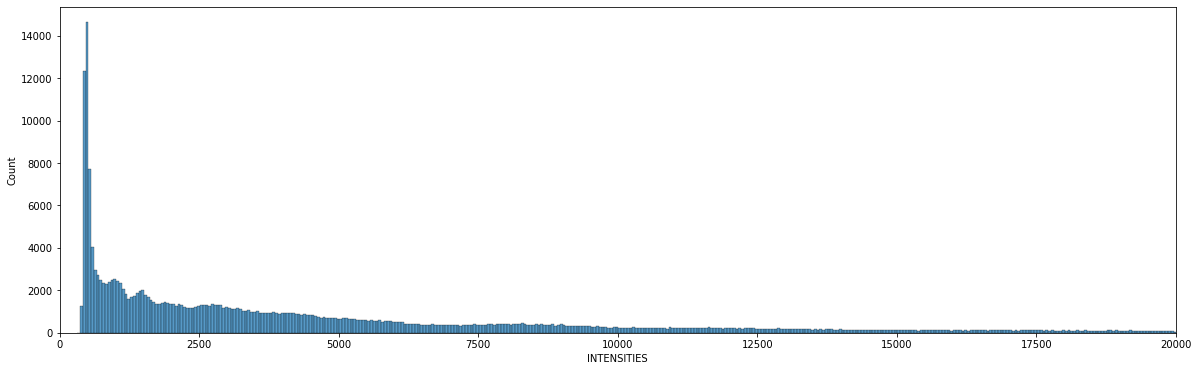

In [66]:
plt.figure(figsize=(20, 6))
intensities = get_intensities(spectra_df, 4)
df = pd.DataFrame({"INTENSITIES": intensities})
count_intensities_MS2 = sns.histplot(data=df[df["INTENSITIES"]<20000], x="INTENSITIES", binwidth=50)
count_intensities_MS2.set_xlim(0,20000)
save_fig("histo_intensities_MS4")

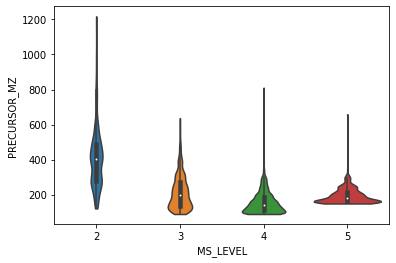

In [67]:
Precursor_against_mslevel = sns.violinplot(data=spectra_df, x="MS_LEVEL", y="PRECURSOR_MZ", cut=0)
save_fig("Violin_Precursor_against_mslevel")

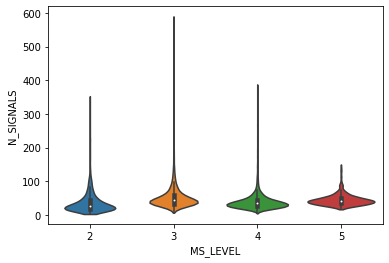

In [68]:
Signals_against_MSlevel = sns.violinplot(data=spectra_df, x="MS_LEVEL", y="N_SIGNALS", cut=0)
save_fig("Violin_Signals_against_MSlevel")

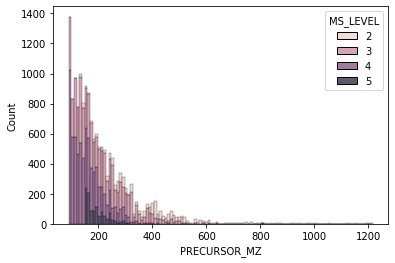

In [69]:
sns.histplot(data=spectra_df, x="PRECURSOR_MZ", hue="MS_LEVEL", multiple="stack")
save_fig("histo_MSlevel")

In [15]:

intensities  = get_intensities(spectra_df, 2)
df = pd.DataFrame({"INTENSITIES": intensities})
df[df["INTENSITIES"]>10000]

,INTENSITIES
4,181086
6,18808
14,171993
23,12923
28,142762
...,...
78013,51654
78014,26259
78015,144152
78016,13980
